In [6]:
import pandas as pd

data = pd.read_json('/content/Musical_Instruments_5.json', lines=True)
type(data)

pandas.core.frame.DataFrame

In [24]:
# Importing necessary paackages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import string

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
seed = 4353

In [8]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [9]:
data.columns = data.columns.str.lower()
data.columns

Index(['reviewerid', 'asin', 'reviewername', 'helpful', 'reviewtext',
       'overall', 'summary', 'unixreviewtime', 'reviewtime'],
      dtype='object')

In [10]:
data.isnull().sum()

reviewerid         0
asin               0
reviewername      27
helpful            0
reviewtext         0
overall            0
summary            0
unixreviewtime     0
reviewtime         0
dtype: int64

In [11]:
print('The train dataset contans {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The train dataset contans 10261 rows and 9 columns


In [14]:
data.overall

0        5
1        5
2        5
3        5
4        5
        ..
10256    5
10257    5
10258    4
10259    4
10260    4
Name: overall, Length: 10261, dtype: int64

Text(0.5, 0, 'Overall ratings')

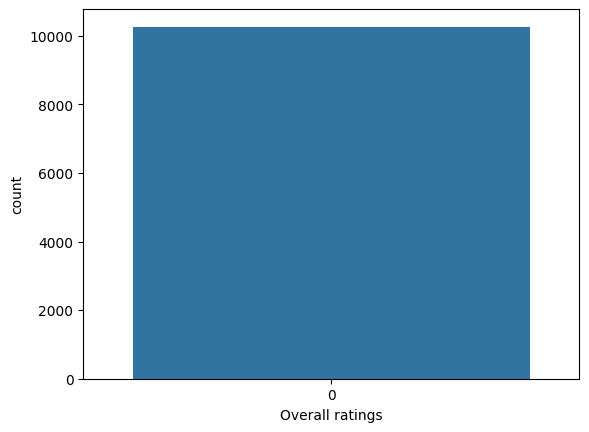

In [15]:
sns.countplot(data.overall)
plt.xlabel('Overall ratings')

In [16]:
# replacing numerical values with categorical values to reduce the classes to sentiments

data['sentiment'] = data.overall.replace({
    1:'negative',
    2:'negative',
    3:'neutral',
    4:'positive',
    5:'positive'
})

In [17]:
#Creating Train and Test datasets with only the product reviews (complete Review = reviewtext + summary)

X_data = data['reviewtext'] + ' ' + data['summary']
y_data = data['sentiment']

In [18]:
# changing the datatype from object to string

X_data = X_data.astype(str)

In [19]:
# creating new dataframe

X_data_df = pd.DataFrame(data=X_data)
X_data_df.columns = ['review']
X_data_df.head()

,review
0,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...
2,The primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...
4,This pop filter is great. It looks and perform...


In [20]:
# creating functions for text processing

string.punctuation
def final(X_data_full):

    # function for removing punctuations
    def remove_punct(X_data_func):
        string1 = X_data_func.lower()
        translation_table = dict.fromkeys(map(ord, string.punctuation),' ')
        string2 = string1.translate(translation_table)
        return string2

    X_data_full_clear_punct = []
    for i in range(len(X_data_full)):
        test_data = remove_punct(X_data_full[i])
        X_data_full_clear_punct.append(test_data)

    # function to remove stopwords
    def remove_stopwords(X_data_func):
        pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
        string2 = pattern.sub(' ', X_data_func)
        return string2

    X_data_full_clear_stopwords = []
    for i in range(len(X_data_full)):
        test_data = remove_stopwords(X_data_full[i])
        X_data_full_clear_stopwords.append(test_data)

    # function for tokenizing
    def tokenize_words(X_data_func):
        words = nltk.word_tokenize(X_data_func)
        return words

    X_data_full_tokenized_words = []
    for i in range(len(X_data_full)):
        test_data = tokenize_words(X_data_full[i])
        X_data_full_tokenized_words.append(test_data)

    # function for lemmatizing
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words

    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full[i])
        X_data_full_lemmatized_words.append(test_data)

    # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()


    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()

    return X_data_full_tfidf

In [22]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [30]:
# running the function

data_X = final(X_data)
X_train, X_test, y_train, y_test = train_test_split(data_X, y_data, test_size=0.25, random_state= seed)

In [34]:
y_train

2743    positive
8445    positive
889     positive
6405    positive
5855     neutral
          ...   
4352    positive
6374    positive
8110    positive
8926    positive
4484    positive
Name: sentiment, Length: 7695, dtype: object

# Model Selection

## Multinomial Naive Bayes

In [31]:
# Instatiation, fitting and prediction

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predictions = MNB.predict(X_test)

In [32]:
# Model evaluation

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

MNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       122
     neutral       0.00      0.00      0.00       208
    positive       0.87      1.00      0.93      2236

    accuracy                           0.87      2566
   macro avg       0.29      0.33      0.31      2566
weighted avg       0.76      0.87      0.81      2566

[[   0    0  122]
 [   0    0  208]
 [   0    0 2236]]
Accuracy :  87.14  %
f1_score :  0.812


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## XGBoost

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)

In [36]:
# Instatiation, fitting and predictions

xgb_ = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed= seed)

xgb_.fit(X_train, y_train_xgb)
predictions = xgb_.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


KeyboardInterrupt: ignored

## Random Forest

In [37]:
# Instatiation, fitting and predictions

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10, random_state= seed)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [38]:
# Model evaluation

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    negative       0.50      0.02      0.05       122
     neutral       0.47      0.04      0.07       208
    positive       0.88      1.00      0.93      2236

    accuracy                           0.87      2566
   macro avg       0.62      0.35      0.35      2566
weighted avg       0.83      0.87      0.82      2566

[[   3    3  116]
 [   0    8  200]
 [   3    6 2227]]
Accuracy :  87.22  %
f1_score :  0.82


## SVM

In [39]:
# Instatiation and fitting

from sklearn.svm import SVC
from sklearn.model_selection import KFold
svc = SVC(random_state=seed)

In [ ]:
# using KFold cross validation technique
kf=  KFold(n_splits=5)

# Hyperparametric tuning using grid search
param_grid = [{'kernel':['rbf'],
              'gamma':[1e-3, 1e-4],
              'C':[1, 10, 100, 1000]},
             {'kernel':['linear'],
             'C':[1, 10, 100, 1000]}]

grid = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=kf)
grid.fit(X_train, y_train)

print('Estimator: ', grid.best_estimator_)
print('Best params : \n', grid.best_params_)
print('Output Classes: ', grid.classes_)
print('Training Accuracy: ', grid.best_score_)

In [ ]:
# predictions

predictions = grid.predict(X_test)

print(classification_report(y_test, predictions))

svc_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
svc_accuracy = round((accuracy_score(y_test, predictions)*100), 2)

print("Accuracy : " , svc_accuracy , " %")
print("f1_score : " , svc_f1)

## LSTM

In [42]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32
max_words=5000

model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=X_train.shape[1]))
model.add(LSTM(100))
model.add(Dense(3,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 32)          160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 213503 (834.00 KB)
Trainable params: 213503 (834.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [43]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
# converting categorical variables in y_train to numerical variables
y_train_dummies = pd.get_dummies(y_train).values
print('Shape of Label tensor: ', y_train_dummies.shape)

Shape of Label tensor:  (7695, 3)


In [45]:
#train the model
model.fit(X_train, y_train_dummies, epochs=5, batch_size=32)
#model.sav('MusicalInstrumentReviews.h5')

Epoch 1/5
241/241 [==============================] - 180s 737ms/step - loss: 0.4662 - accuracy: 0.8780
Epoch 2/5
241/241 [==============================] - 175s 724ms/step - loss: 0.4444 - accuracy: 0.8819
Epoch 3/5
241/241 [==============================] - 174s 722ms/step - loss: 0.4435 - accuracy: 0.8819
Epoch 4/5
241/241 [==============================] - 175s 727ms/step - loss: 0.4440 - accuracy: 0.8819
Epoch 5/5
241/241 [==============================] - 173s 720ms/step - loss: 0.4425 - accuracy: 0.8819


In [46]:
model.save('MusicalInstrumentReviews.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
# converting categorical variables in y_train to numerical variables
y_test_dummies = pd.get_dummies(y_test).values
print('Shape of Label tensor: ', y_test_dummies.shape)

Shape of Label tensor:  (2566, 3)


In [48]:
# model evaluation
from keras.models import load_model

model = load_model('MusicalInstrumentReviews.h5')
scores = model.evaluate(X_test, y_test_dummies)

LSTM_accuracy = scores[1]*100

print('Test accuracy: ', scores[1]*100, '%')

81/81 [==============================] - 16s 191ms/step - loss: 0.4701 - accuracy: 0.8714
Test accuracy:  87.13951706886292 %


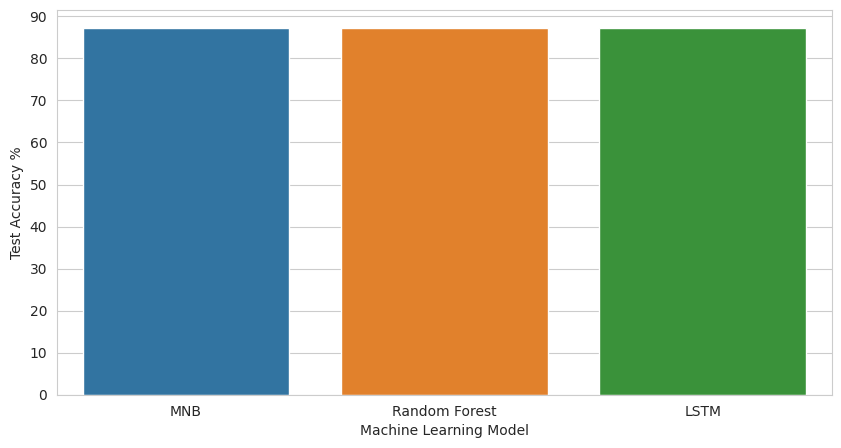

In [51]:
model = ['MNB', 'Random Forest', 'LSTM']
acc = [MNB_accuracy, rfc_accuracy, LSTM_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test Accuracy %")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model, y= acc)
plt.show()